In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
from matplotlib.ticker import LogFormatter
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
import pickle
from scipy.stats import norm

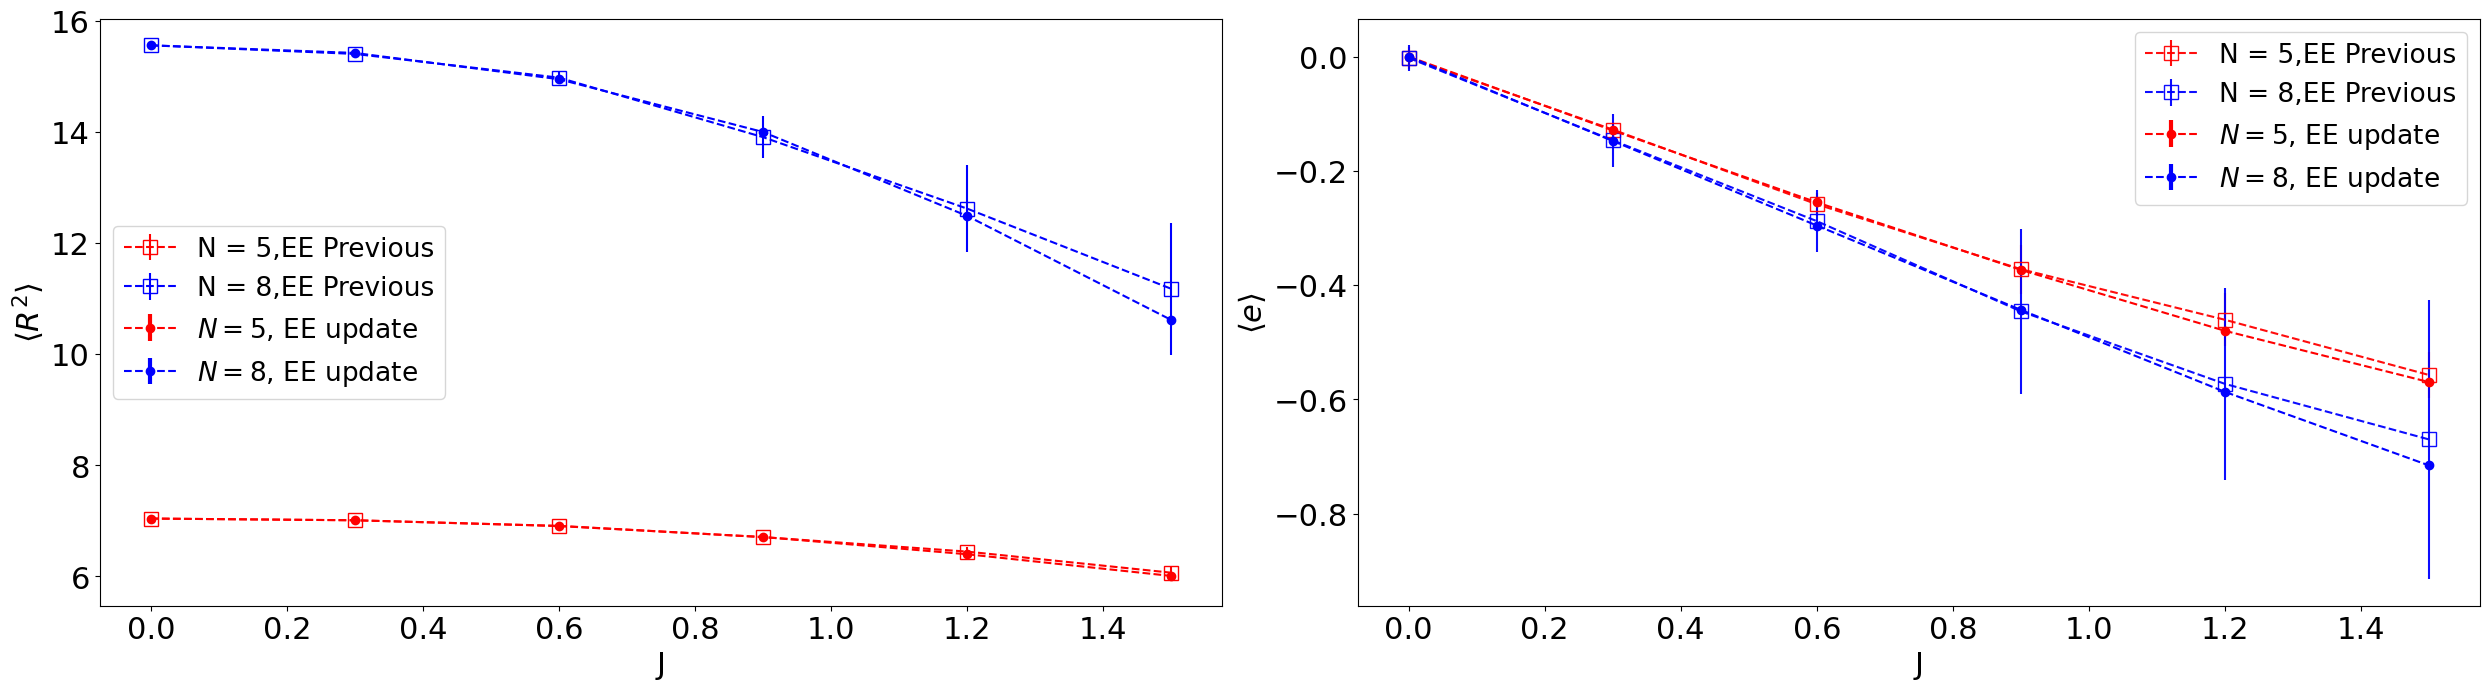

In [3]:
n_plots = 2
fig, axes = plt.subplots(1, n_plots, figsize=(25,7)) 
#fig, axes = plt.subplots(1, n_plots, figsize=(9,3))
axes = axes.reshape(-1)

color = ["red", "blue", "green"]

#previous results 
data_np = np.loadtxt("EE/XY_shortrange_PreviousResults/shortresults.txt", skiprows=0)
data_np1 = np.loadtxt("EE/XY_shortrange_PreviousResults/shortresults1.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))
y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]
lengths = np.unique(data_np[:, 0])
i=0
for l in lengths:
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]

    axes[0].errorbar(J_l, data_l[:,3], yerr=data_l[:,4], c= color[i],  fillstyle='none',
                     fmt="s--", ms = 10, label = "N = " + str(int(l)) + ",EE Previous")
    axes[1].errorbar(J_l, data_l[:,5]/l, yerr=data_l[:,6]/np.sqrt(10), alpha = 0.95, c= color[i],  fillstyle='none', fmt="s--", ms = 10, label = "N = " + str(int(l)) + ",EE Previous")
    i+=1


#Plot data from updated EE
pathlists = Path("EE/XY_OriginalRepeat/").glob("*.csv")
pathlists = [str(pathlist) for pathlist in pathlists]
dfs = [pd.read_csv(data, sep = " ") for data in pathlists]
df = pd.concat(dfs)

i = 0 
for L, grp in df.groupby("L"):
    if (L!=5) and  (L!=8): continue
    data_byJ_mean = grp.groupby("J", as_index=False).mean()
    data_byJ_std = grp.groupby("J", as_index=False).std()
    axes[0].errorbar(data_byJ_mean['J'], data_byJ_mean['r2'], 
                     yerr=data_byJ_std['r2'], color = color[i],
                    fmt='o--', elinewidth=3, label=r"$N=%s$, EE update" % L)
    axes[1].errorbar(data_byJ_mean['J'], data_byJ_mean['E']/L,
                     yerr=data_byJ_std['E']/L, color = color[i],
                     fmt='o--', elinewidth=3, label=r"$N=%s$, EE update" % L)
    i+=1
# new Exact Enumeration results


axes[0].set_ylabel(r'$\langle R^2 \rangle$', fontsize=22)
axes[1].set_ylabel(r'$\langle e \rangle$', fontsize=22)
axes[0].legend(fontsize = 19)
axes[1].legend(fontsize = 19)
for i in range(n_plots):
    axes[i].set_xlabel("J", fontsize=22)
    axes[i].tick_params(axis='x', labelsize=22)
    axes[i].tick_params(axis='y', labelsize=22)
plt.tight_layout()
plt.savefig("images/EE_shortRange.png", bbox_inches='tight')


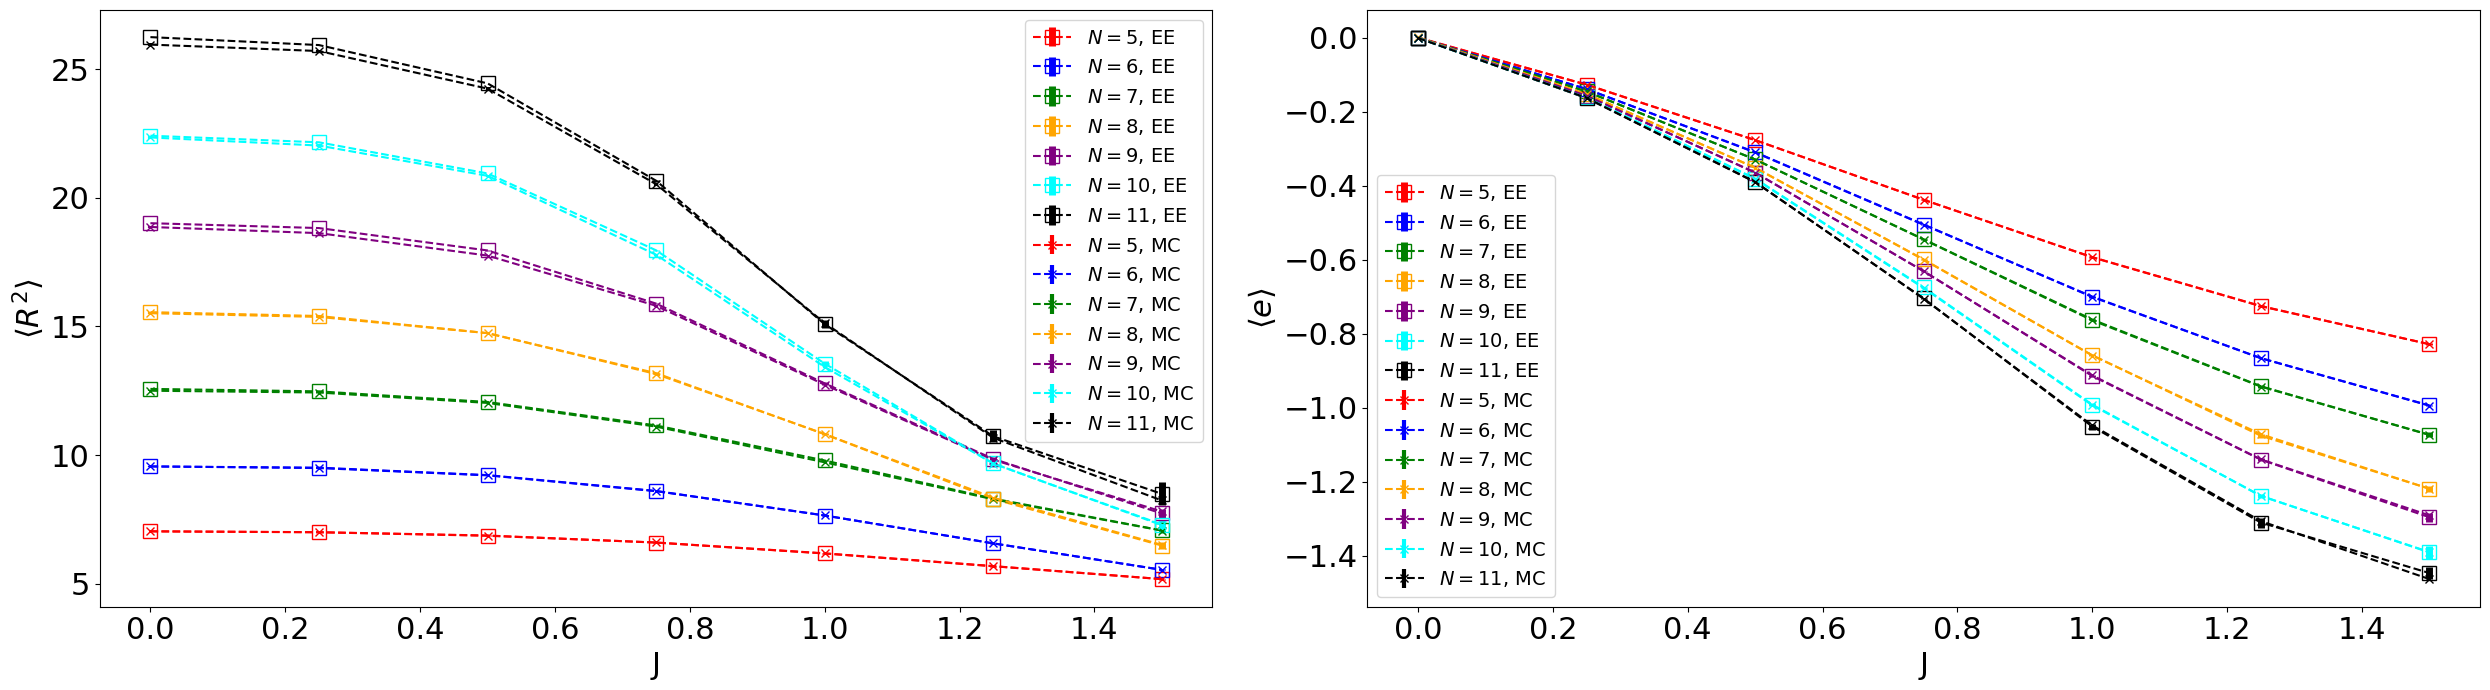

In [12]:
n_plots = 2
fig, axes = plt.subplots(1, n_plots, figsize=(25,7))
#fig, axes = plt.subplots(1, n_plots, figsize=(9,3))
axes = axes.reshape(-1)

color = ["red", "blue", "green", "orange", "purple", "cyan", "black"]

# new Exact Enumeration results
pathlists = Path("EE/XY_Interaction/").glob("*.csv")
pathlists = [str(pathlist) for pathlist in pathlists]
dfs = [pd.read_csv(data, sep = " ") for data in pathlists]
df = pd.concat(dfs)

i = 0
for L, grp in df.groupby("L"):
    #if (L!=5) and (L!=8): continue
    if L > 11: continue
    data_byJ_mean = grp.groupby("J", as_index=False).mean()
    data_byJ_std = grp.groupby("J", as_index=False).std()
    axes[0].errorbar(data_byJ_mean['J'], data_byJ_mean['r2'],
                     yerr=data_byJ_std['r2'], color = color[i], fillstyle='none',
                     fmt='s--', ms = 10, elinewidth=5, label=r"$N=%s$, EE " % L)
    axes[1].errorbar(data_byJ_mean['J'], data_byJ_mean['E']/L,
                     yerr=data_byJ_std['E']/L, color = color[i], fillstyle='none',
                     fmt='s--', ms = 10, elinewidth=5, label=r"$N=%s$, EE " % L)
    i+=1


pathlists = Path("XY_MC/For_EE_OUTLENGTH_4/").glob("*.out")
pathlists = [str(pathlist) for pathlist in pathlists]
dfs = [pd.read_csv(data, sep = " ", index_col=False).tail(1) for data in pathlists]
df = pd.concat(dfs)
df = df.sort_values(by=["J"])
i = 0
for L, grp in df.groupby("L"):
    #if (L!=5) and (L!=8): continue
    if L > 11: continue
    axes[0].errorbar( grp['J'],  grp['R2'],
                     yerr=grp['R2_std'], color = color[i],
                     fmt='x--', elinewidth=3, label=r"$N=%s$, MC " % L)
    axes[1].errorbar(grp['J'], grp['E']/L,
                     yerr=grp['E_std']/L, color = color[i],
                     fmt='x--', elinewidth=3, label=r"$N=%s$, MC " % L)
    i+=1

axes[0].set_ylabel(r'$\langle R^2 \rangle$', fontsize=22)
axes[1].set_ylabel(r'$\langle e \rangle$', fontsize=22)
axes[0].legend(fontsize = 14)
axes[1].legend(fontsize = 14)
for i in range(n_plots):
    axes[i].set_xlabel("J", fontsize=22)
    axes[i].tick_params(axis='x', labelsize=22)
    axes[i].tick_params(axis='y', labelsize=22)
plt.tight_layout()
plt.savefig("images/EE-LongRange_OUT4.png", bbox_inches='tight') 

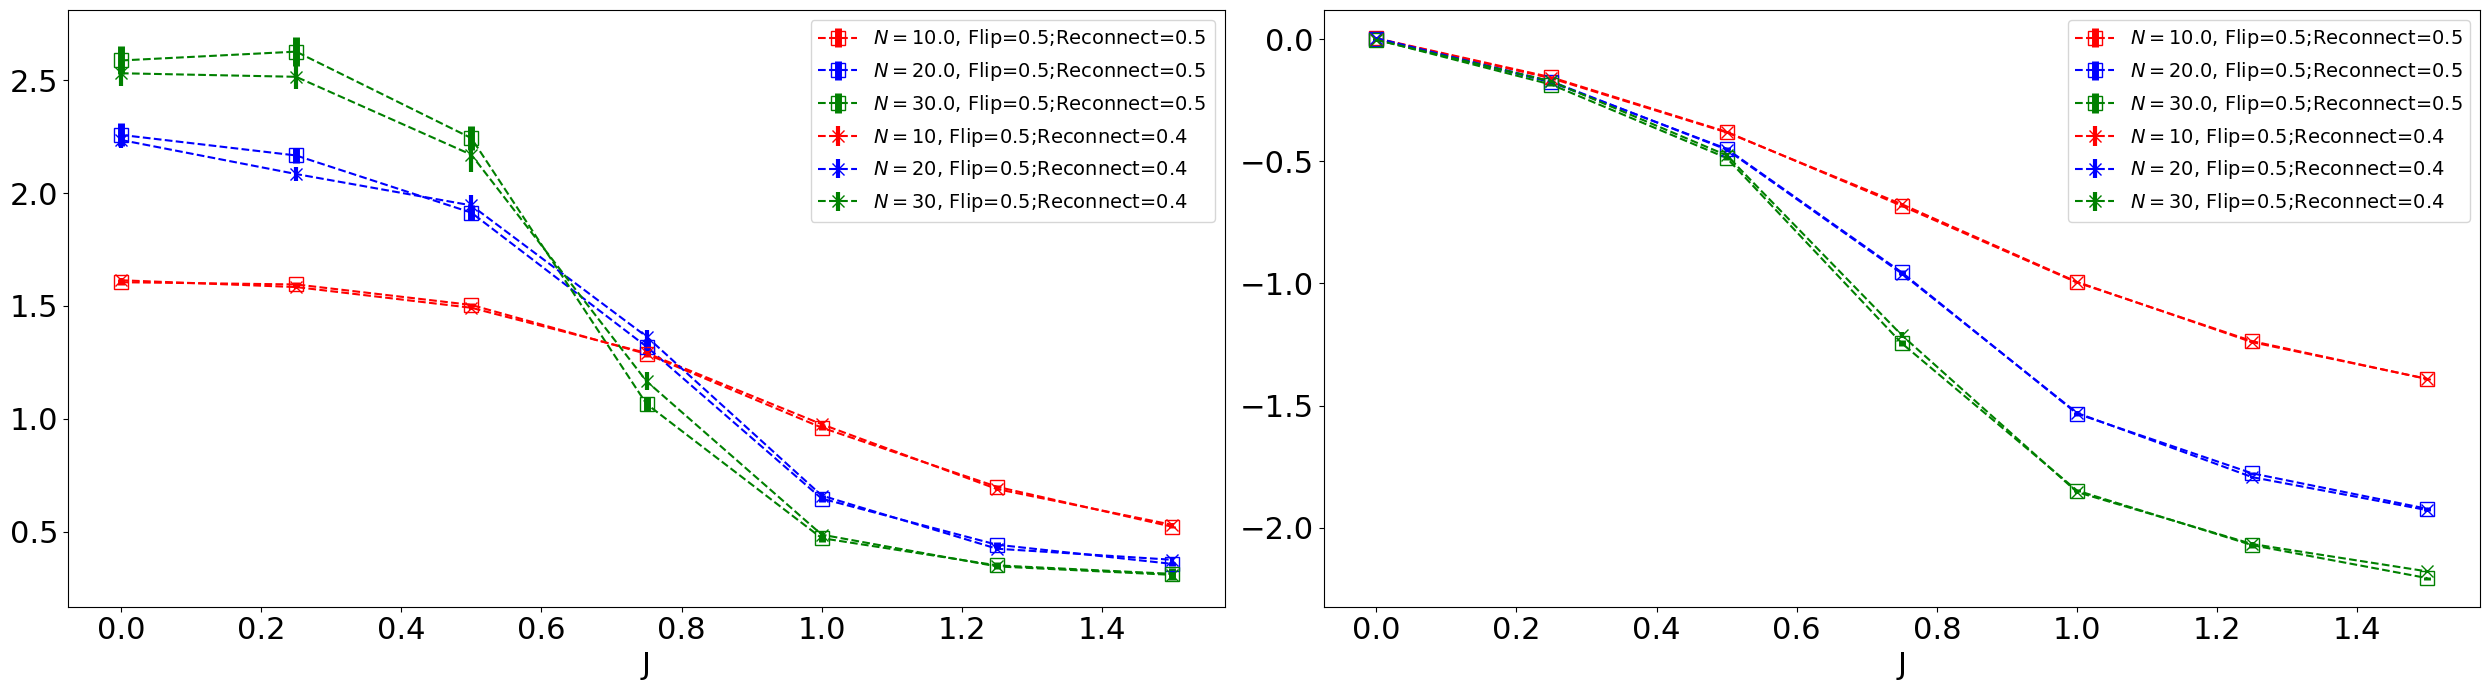

In [11]:
n_plots = 2
fig, axes = plt.subplots(1, n_plots, figsize=(25, 7))
#fig, axes = plt.subplots(1, n_plots, figsize=(9,3))
axes = axes.reshape(-1)

color = ["red", "blue", "green", "orange", "purple", "cyan", "black"]

nu = 2*4/7 

# new Exact Enumeration results
pathlists = Path("XY_MC/For_Checks/Local05Reconnect05/").glob("*.out")
pathlists = [str(pathlist) for pathlist in pathlists]
dfs = [pd.read_csv(data, sep = " ", index_col=False).tail(1) for data in pathlists]
df = pd.concat(dfs)
df = df.sort_values(by=["J"])
i = 0
for L, grp in df.groupby("L"):
    if L == 50: continue
    axes[0].errorbar(grp['J'], grp['R2']/np.power(L, nu),
                     yerr=grp['R2_std']/np.power(L, nu), color=color[i], fillstyle='none',
                     fmt='s--', ms=10, elinewidth=5, label=r"$N=%s$, Flip=0.5;Reconnect=0.5 " % L)
    axes[1].errorbar(grp['J'], grp['E']/L,
                     yerr=grp['E_std']/L, color=color[i], fillstyle='none',
                     fmt='s--', ms=10, elinewidth=5, label=r"$N=%s$, Flip=0.5;Reconnect=0.5" % L)
    i += 1

pathlists = Path("XY_MC/For_Checks/Local09Reconnect01/").glob("*.out")
pathlists = [str(pathlist) for pathlist in pathlists]
dfs = [pd.read_csv(data, sep = " ", index_col=False).tail(1) for data in pathlists]
df = pd.concat(dfs)
df = df.sort_values(by=["J"])
i = 0
for L, grp in df.groupby("L"):
    axes[0].errorbar(grp['J'], grp['R2']/np.power(L, nu),
                     yerr=grp['R2_std']/np.power(L, nu), color=color[i], fillstyle='none',
                     fmt='x--', ms=8, elinewidth=3, label=r"$N=%s$, Flip=0.5;Reconnect=0.4 " % L)
    axes[1].errorbar(grp['J'], grp['E']/L,
                     yerr=grp['E_std']/L, color=color[i], fillstyle='none',
                     fmt='x--', ms=8, elinewidth=3, label=r"$N=%s$, Flip=0.5;Reconnect=0.4 " % L)
    i += 1

axes[0].legend(fontsize = 14)
axes[1].legend(fontsize = 14)
for i in range(n_plots):
    axes[i].set_xlabel("J", fontsize=22)
    axes[i].tick_params(axis='x', labelsize=22)
    axes[i].tick_params(axis='y', labelsize=22)
plt.tight_layout()

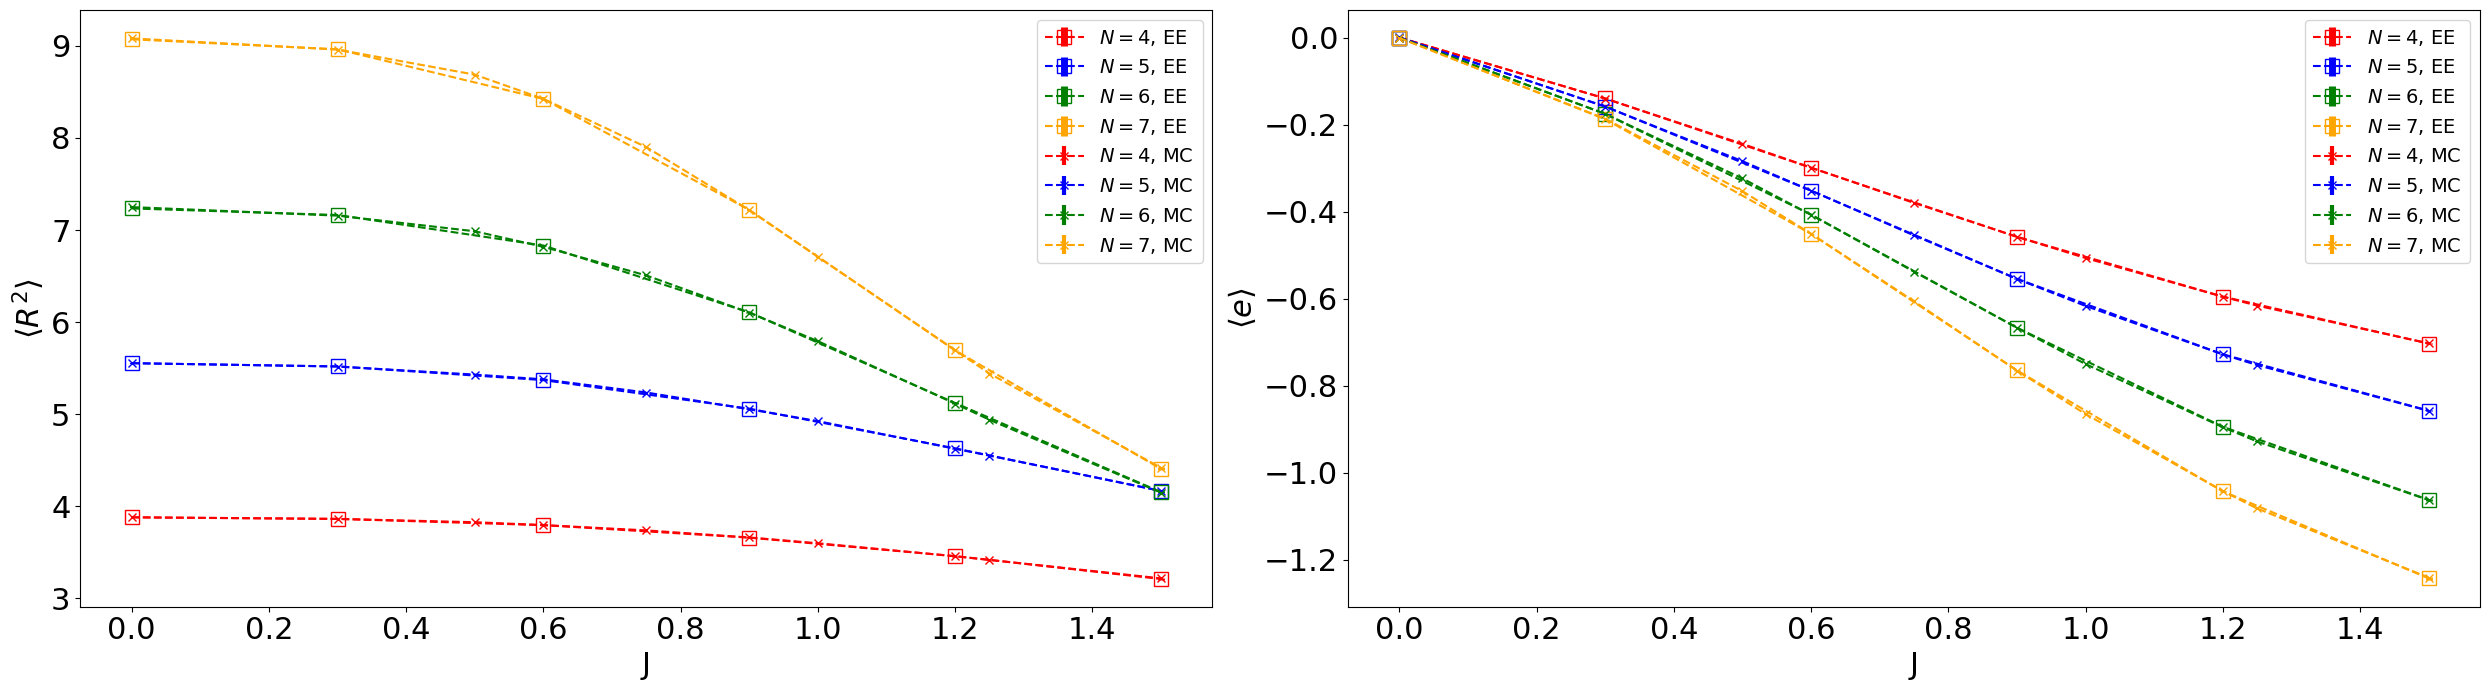

In [24]:
n_plots = 2
fig, axes = plt.subplots(1, n_plots, figsize=(25,7))
#fig, axes = plt.subplots(1, n_plots, figsize=(9,3))
axes = axes.reshape(-1)

color = ["red", "blue", "green", "orange", "purple", "cyan", "black"]

# new Exact Enumeration results
pathlists = Path("EE/XY_Interaction_3D/").glob("*.csv")
pathlists = [str(pathlist) for pathlist in pathlists]
dfs = [pd.read_csv(data, sep = " ") for data in pathlists]
df = pd.concat(dfs)

i = 0
for L, grp in df.groupby("L"):
    #if (L!=5) and (L!=8): continue
    if L > 11: continue
    data_byJ_mean = grp.groupby("J", as_index=False).mean()
    data_byJ_std = grp.groupby("J", as_index=False).std()
    axes[0].errorbar(data_byJ_mean['J'], data_byJ_mean['r2'],
                     yerr=data_byJ_std['r2'], color = color[i], fillstyle='none',
                     fmt='s--', ms = 10, elinewidth=5, label=r"$N=%s$, EE " % L)
    axes[1].errorbar(data_byJ_mean['J'], data_byJ_mean['E']/L,
                     yerr=data_byJ_std['E']/L, color = color[i], fillstyle='none',
                     fmt='s--', ms = 10, elinewidth=5, label=r"$N=%s$, EE " % L)
    i+=1



pathlists = Path("XY_MC/For_EE_3D/").glob("*.out")
pathlists = [str(pathlist) for pathlist in pathlists]
dfs = [pd.read_csv(data, sep = " ", index_col=False).tail(1) for data in pathlists]
df = pd.concat(dfs)
df = df.sort_values(by=["J"])
i = 0
for L, grp in df.groupby("L"):
    #if (L!=5) and (L!=8): continue
    if L > 11: continue
    axes[0].errorbar( grp['J'],  grp['R2'],
                      yerr=grp['R2_std'], color = color[i],
                      fmt='x--', elinewidth=3, label=r"$N=%s$, MC " % L)
    axes[1].errorbar(grp['J'], grp['E']/L,
                     yerr=grp['E_std']/L, color = color[i],
                     fmt='x--', elinewidth=3, label=r"$N=%s$, MC " % L)
    i+=1
    

axes[0].set_ylabel(r'$\langle R^2 \rangle$', fontsize=22)
axes[1].set_ylabel(r'$\langle e \rangle$', fontsize=22)
axes[0].legend(fontsize = 14)
axes[1].legend(fontsize = 14)
for i in range(n_plots):
    axes[i].set_xlabel("J", fontsize=22)
    axes[i].tick_params(axis='x', labelsize=22)
    axes[i].tick_params(axis='y', labelsize=22)
plt.tight_layout()
plt.savefig("images/EE-LongRange_3D_0.png", bbox_inches='tight')